Procesando: imagenes\OIP (1).jpg


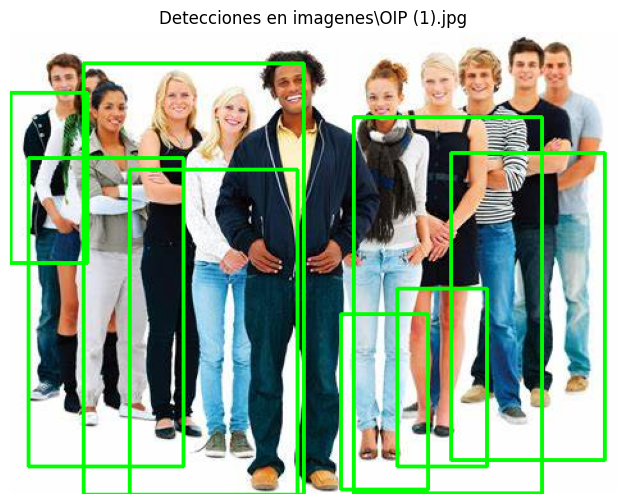

Procesando: imagenes\R.jpg


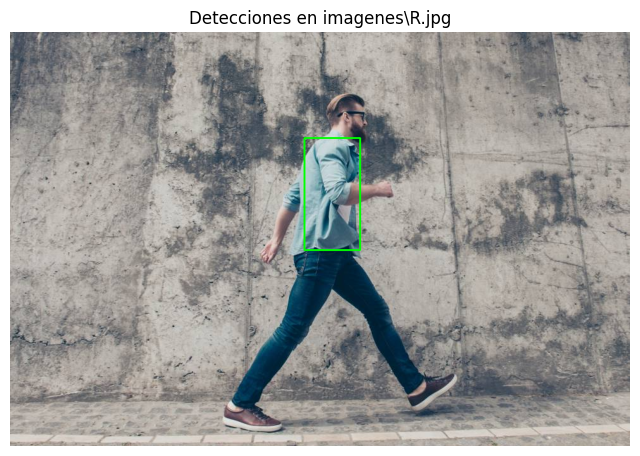

In [6]:
import cv2
import glob
import matplotlib.pyplot as plt

def procesar_imagen(ruta_imagen, hog_detector):
    # Cargar imagen y verificar que se haya leído correctamente
    imagen = cv2.imread(ruta_imagen)
    if imagen is None:
        print(f"Error al cargar la imagen: {ruta_imagen}")
        return

    # Detectar personas con parámetros ajustados para mayor precisión
    # winStride: tamaño del paso, padding: compensación para la ventana,
    # scale: factor de reducción de la imagen en cada pasada.
    locations, weights = hog_detector.detectMultiScale(
        imagen,
        winStride=(4, 4),
        padding=(8, 8),
        scale=1.05
    )

    # Dibujar rectángulos en las detecciones
    for (x, y, w, h) in locations:
        cv2.rectangle(imagen, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convertir la imagen de BGR a RGB para mostrarla con matplotlib
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(imagen_rgb)
    plt.title(f"Detecciones en {ruta_imagen}")
    plt.axis('off')
    plt.show()

def main():
    # Crear el detector HOG con el SVM pre-entrenado para personas
    hog_detector = cv2.HOGDescriptor()
    hog_detector.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Ruta a la carpeta con imágenes (ajusta la ruta según tu organización)
    rutas_imagenes = glob.glob("imagenes/*.jpg")
    if not rutas_imagenes:
        print("No se encontraron imágenes en la ruta especificada.")
        return

    # Procesar cada imagen encontrada
    for ruta in rutas_imagenes:
        print(f"Procesando: {ruta}")
        procesar_imagen(ruta, hog_detector)

if __name__ == "__main__":
    main()
